In [1]:
# Import required libraries

import pandas as pd
import requests
import time
from datetime import datetime, timedelta

In [93]:
# General function to call NYT API

def fetch_books(date):
    list_name = "combined-print-and-e-book-fiction"
    url = f"https://api.nytimes.com/svc/books/v3/lists/{date}/{list_name}.json"

    params = {
        'api-key': 'SECRET'
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()

        data = response.json()

        if 'results' in data and 'books' in data['results']:
            return data['results']['books']
        else:
            print(f"No books data found for date: {date}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for date {date}: {e}")
        return None

In [87]:
# Specific function to collect Rank, Title, and Author

def collect_book_data(start_date, end_date):
    all_books_df = pd.DataFrame()

    current_date = start_date

    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        print(f"Fetching data for date: {date_str}...")

        backoff_time = 16
        while True:
            books_data = fetch_books(date_str)
            
            if books_data is not None:
                break
            
            print(f"Waiting for {backoff_time} seconds before retrying...")
            time.sleep(backoff_time)
            backoff_time += 10

        if books_data:
            book_data = []
            for book in books_data:
                book_info = {
                    'Rank': book.get('rank'),
                    'Title': book.get('title'),
                    'Author': book.get('author'),
                    'List Date': date_str
                }
                book_data.append(book_info)

            current_df = pd.DataFrame(book_data)

            all_books_df = pd.concat([all_books_df, current_df], ignore_index=True)

        time.sleep(3)
        print("Processing next date...")

        current_date += timedelta(days=7)

    print(all_books_df.head(5))
    print(f"Total books fetched: {len(all_books_df)}")

    return all_books_df

In [95]:
# Input 2013 into function

start_date = datetime(2013, 1, 1)
end_date = datetime(2013, 12, 31)

books_df = collect_book_data(start_date, end_date)

Fetching data for date: 2013-01-01...
Processing next date...
Fetching data for date: 2013-01-08...
Processing next date...
Fetching data for date: 2013-01-15...
Processing next date...
Fetching data for date: 2013-01-22...
Processing next date...
Fetching data for date: 2013-01-29...
Processing next date...
Fetching data for date: 2013-02-05...
Error fetching data for date 2013-02-05: 429 Client Error: Too Many Requests for url: https://api.nytimes.com/svc/books/v3/lists/2013-02-05/combined-print-and-e-book-fiction.json?api-key=1WGbykaIHbCAIavKfqQJ8z0cXttoQ2pZ
Waiting for 16 seconds before retrying...
Error fetching data for date 2013-02-05: 429 Client Error: Too Many Requests for url: https://api.nytimes.com/svc/books/v3/lists/2013-02-05/combined-print-and-e-book-fiction.json?api-key=1WGbykaIHbCAIavKfqQJ8z0cXttoQ2pZ
Waiting for 26 seconds before retrying...
Processing next date...
Fetching data for date: 2013-02-12...
Processing next date...
Fetching data for date: 2013-02-19...
Proc

In [97]:
# Save in seperate variable

books_2013 = books_df

In [99]:
# BACKUP!!!

books_2013_backup = books_2013

In [212]:
books_2013_backup_2 = books_2013_backup

In [11]:
# Function to clean Author data

def extract_author(author):
    return author.split(' and ')[0].split(' with ')[0]

In [133]:
# Clean Author data

books_2013['Author'] = books_2013['Author'].apply(extract_author)

Max retries reached for Joel_C_Rosenberg. Skipping.Error fetching data for Joel_C_Rosenberg: Socket operation on non-socket
Max retries reached for JC_Reed. Skipping.
Request exception for Katie_Ashley: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Katie_Ashley, retrying (1/5)...
Max retries reached for C_J_Box. Skipping.
Max retries reached for Jasinda_Wilder. Skipping.
Request exception for H_M_Ward: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/H_M_Ward, retrying (1/5)...
Max retries reached for JA_Redmerski. Skipping.
Max retries reached for Ron_Carr. Skipping.
Request exception for J_Kenner: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/J_Kenner, retrying (1/5)...
Request exception for Laurann_Dohner: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Laurann_Dohner, retrying (1/5)...
Request exception for Samantha_Young: 40

In [138]:
# Check this worked

books_2013['Author'].str.contains(' and | with ', na=False).sum()

Request exception for Tara_Sue_Me: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Tara_Sue_Me, retrying (1/5)...Error fetching data for Tara_Sue_Me: Socket operation on non-socket
Request exception for Darcie_Chan: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Darcie_Chan, retrying (5/5)...
Max retries reached for Irene_Zatko. Skipping.
Request exception for S_C_Stephens: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/S_C_Stephens, retrying (4/5)...
Request exception for J_Lynn: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/J_Lynn, retrying (4/5)...
Request exception for Joel_C_Rosenberg: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Joel_C_Rosenberg, retrying (4/5)...
Request exception for Jasinda_Wilder: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/su

0

In [144]:
books_2013['Author'].unique()

array(['Gillian Flynn', 'John Grisham', 'E L James', 'Nicholas Sparks',
       'David Baldacci', 'James Patterson', 'Tom Clancy',
       'Janet Evanovich', 'Yann Martel', 'Michael Connelly',
       'J K Rowling', 'Jessica Sorensen', 'Vince Flynn', 'Wm Paul Young',
       'Stephen King', 'Ayana Mathis', 'Mitch Albom', 'Abbi Glines',
       'Colleen Hoover', 'Stephenie Meyer', 'Stieg Larsson', 'Sara Gruen',
       'Sylvia Day', 'Addison Moore', 'Maya Banks', 'Linda Howard',
       'W E B Griffin', 'Robert Jordan', 'Stuart Woods',
       'George Saunders', 'Jayne Ann Krentz', 'James Rollins',
       'Brad Meltzer', 'Stephen Hunter', 'Glenn Beck', 'Robert Crais',
       'Kim Harrison', 'Gail McHugh', 'Danielle Steel', 'Debbie Macomber',
       'Matthew Quick', 'Sister Souljah', 'Lorena McCourtney',
       'Isaac Marion', 'Lisa Gardner', 'A L Jackson', 'Lisa Kleypas',
       'Lucy Kevin', 'Lisa Renee Jones', 'Maeve Binchy',
       'Jonathan Kellerman', 'Elisabeth Naughton', 'Christina Laure

In [23]:
# Input 2023 into function


start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# Call the function
books_df = collect_book_data(start_date, end_date)

Fetching data for date: 2023-01-01...
Processing next date...
Fetching data for date: 2023-01-08...
Processing next date...
Fetching data for date: 2023-01-15...
Processing next date...
Fetching data for date: 2023-01-22...
Error fetching data for date 2023-01-22: 429 Client Error: Too Many Requests for url: https://api.nytimes.com/svc/books/v3/lists/2023-01-22/combined-print-and-e-book-fiction.json?api-key=p7BsAznhZDBKJaSN6kVuGQUvaT6rDvu3
Waiting for 16 seconds before retrying...
Processing next date...
Fetching data for date: 2023-01-29...
Processing next date...
Fetching data for date: 2023-02-05...
Processing next date...
Fetching data for date: 2023-02-12...
Processing next date...
Fetching data for date: 2023-02-19...
Processing next date...
Fetching data for date: 2023-02-26...
Error fetching data for date 2023-02-26: 429 Client Error: Too Many Requests for url: https://api.nytimes.com/svc/books/v3/lists/2023-02-26/combined-print-and-e-book-fiction.json?api-key=p7BsAznhZDBKJaSN6

In [25]:
# Save in seperate variable

books_2023 = books_df

In [71]:
# BACKUP!!!

books_2023_backup = books_2023

In [210]:
books_2023_backup_2 = books_2023_backup

In [29]:
# Clean Author data

books_2023['Author'] = books_2023['Author'].apply(extract_author)

In [31]:
# Check this worked

books_2023['Author'].str.contains(' and | with ', na=False).sum()

0

In [109]:
# Function to get birth year and nationality from Wikipedia

def get_author_details(author_name):
    try:
        author_name = author_name.replace(' ', '_')
        url = f'https://en.wikipedia.org/api/rest_v1/page/summary/{author_name}'
        response = requests.get(url)
        
        if response.status_code == 200:
            data = response.json()
            description = data.get('description', '')
            extract = data.get('extract', '')
            
            birth_year = None
            nationality = None

            match = re.search(r'\b(born\s(\d{4}))\b', description)
            if match:
                birth_year = int(match.group(2))
            
            match = re.search(r'\b(\d{4})\b', extract)
            if birth_year is None and match:
                birth_year = int(match.group(1))

            nationality_match = re.search(r'(\w+)\swriter|novelist|author|screenwriter', description, re.IGNORECASE)
            if nationality_match:
                nationality = nationality_match.group(1)

            return birth_year, nationality
        elif response.status_code == 429:
            time.sleep(5)  # Wait before retrying
            return get_author_details(author_name)
    except Exception as e:
        print(f"Error fetching data for {author_name}: {e}")
    return None, None

unique_authors = books_2013['Author'].unique()

author_details_dict = {}

with ThreadPoolExecutor(max_workers=10) as executor:
    future_to_author = {executor.submit(get_author_details, author): author for author in unique_authors}
    for i, future in enumerate(as_completed(future_to_author), 1):
        author = future_to_author[future]
        try:
            birth_year, nationality = future.result()
            if birth_year is not None or nationality is not None:
                author_details_dict[author] = {'birth_year': birth_year, 'nationality': nationality}
        except Exception as e:
            print(f"Error processing {author}: {e}")

books_2013['Age'] = books_2013['Author'].map(lambda author: 2013 - author_details_dict[author]['birth_year'] if author in author_details_dict and author_details_dict[author]['birth_year'] is not None else np.nan)
books_2013['Nationality'] = books_2013['Author'].map(lambda author: author_details_dict[author]['nationality'] if author in author_details_dict else np.nan)

print(books_2013)

      Rank                 Title             Author   List Date   Age  \
0        1             GONE GIRL      Gillian Flynn  2013-01-01  42.0   
1        2         THE RACKETEER       John Grisham  2013-01-01  58.0   
2        3  FIFTY SHADES OF GREY          E L James  2013-01-01  -6.0   
3        4            SAFE HAVEN    Nicholas Sparks  2013-01-01  48.0   
4        5         THE FORGOTTEN     David Baldacci  2013-01-01  53.0   
...    ...                   ...                ...         ...   ...   
1055    16            DARK WITCH       Nora Roberts  2013-12-31   NaN   
1056    17                  DUST  Patricia Cornwell  2013-12-31  57.0   
1057    18  FIFTY SHADES OF GREY          E L James  2013-12-31  -6.0   
1058    19  A DANCE WITH DRAGONS  George R R Martin  2013-12-31  65.0   
1059    20         THE RACKETEER       John Grisham  2013-12-31  58.0   

     Nationality  
0       American  
1       American  
2           None  
3       American  
4           None  
...      

In [152]:
books_2013['Nationality'].value_counts()

Request exception for J_Kenner: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/J_Kenner, retrying (4/5)...


Nationality
American       657
British         82
Australian      23
English         19
Canadian        15
Irish            7
Dutch            2
Norwegian        2
Danish           2
Swedish          1
New Zealand      1
Zimbabwean       1
Name: count, dtype: int64

In [155]:
# Function to get birth year and nationality from Wikipedia

unique_authors = books_2023['Author'].unique()

author_details_dict = {}

with ThreadPoolExecutor(max_workers=10) as executor:
    future_to_author = {executor.submit(get_author_details, author): author for author in unique_authors}
    for i, future in enumerate(as_completed(future_to_author), 1):
        author = future_to_author[future]
        try:
            birth_year, nationality = future.result()
            if birth_year is not None or nationality is not None:
                author_details_dict[author] = {'birth_year': birth_year, 'nationality': nationality}
        except Exception as e:
            print(f"Error processing {author}: {e}")

books_2023['Age'] = books_2023['Author'].map(lambda author: 2013 - author_details_dict[author]['birth_year'] if author in author_details_dict and author_details_dict[author]['birth_year'] is not None else np.nan)
books_2023['Nationality'] = books_2023['Author'].map(lambda author: author_details_dict[author]['nationality'] if author in author_details_dict else np.nan)

print(books_2023)

Request exception for Ana_Reyes: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Ana_Reyes, retrying (1/5)...Request exception for Lucy_Score: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Lucy_Score, retrying (1/5)...

Request exception for Jenny_Jackson: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Jenny_Jackson, retrying (1/5)...
Request exception for Katee_Robert: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Katee_Robert, retrying (1/5)...
Request exception for Ab_Jimenez: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/Ab_Jimenez, retrying (1/5)...
Request exception for T.J._Klune: 404 Client Error: Not Found for url: https://en.wikipedia.org/api/rest_v1/page/summary/T.J._Klune, retrying (1/5)...
Request exception for Mo_Xiang_Tong_Xiu: 404 Client Error: Not Found for url: https://

In [156]:
print(books_2023)

     Rank                              Title               Author   List Date  \
0       1                  IT STARTS WITH US       Colleen Hoover  2023-01-01   
1       2                    IT ENDS WITH US       Colleen Hoover  2023-01-01   
2       3               LESSONS IN CHEMISTRY        Bonnie Garmus  2023-01-01   
3       4                             VERITY       Colleen Hoover  2023-01-01   
4       5               THE BOYS FROM BILOXI         John Grisham  2023-01-01   
..    ...                                ...                  ...         ...   
790    11                      THE HOUSEMAID      Freida McFadden  2023-12-31   
791    12                           TOM LAKE         Ann Patchett  2023-12-31   
792    13                ALEX CROSS MUST DIE      James Patterson  2023-12-31   
793    14  THE SEVEN HUSBANDS OF EVELYN HUGO  Taylor Jenkins Reid  2023-12-31   
794    15              THE COVENANT OF WATER     Abraham Verghese  2023-12-31   

      Age Nationality  
0  

In [158]:
books_2023['Nationality'].value_counts()

Nationality
American       632
British         17
Canadian         9
English          7
Italian          5
New Zealand      2
Swedish          1
Irish            1
Australian       1
Norwegian        1
Name: count, dtype: int64

In [160]:
# Test the Age hypothesis by comparing the ages across the different cohorts

books_2013['Age'].describe()

count    617.000000
mean      52.931929
std       88.945492
min      -11.000000
25%       10.000000
50%       48.000000
75%       59.000000
max      530.000000
Name: Age, dtype: float64

In [174]:
# Need to exclude obviously incorrect vales

books_2013['Age'] = books_2013['Age'].apply(lambda x: np.nan if x < 20 or x > 100 else x)

In [186]:
# Need to make sure that only unique authors are considered

unique_authors_2013 = books_2013.drop_duplicates(subset='Author')

unique_authors_2013['Age'].describe()

count    62.000000
mean     50.677419
std      13.813481
min      20.000000
25%      42.250000
50%      51.000000
75%      60.750000
max      76.000000
Name: Age, dtype: float64

In [178]:
books_2023['Age'].describe()

count    558.000000
mean      46.120072
std       51.627810
min      -11.000000
25%       34.000000
50%       34.000000
75%       56.000000
max      530.000000
Name: Age, dtype: float64

In [180]:
books_2023['Age'] = books_2023['Age'].apply(lambda x: np.nan if x < 20 or x > 100 else x)

In [188]:
unique_authors_2023 = books_2023.drop_duplicates(subset='Author')

unique_authors_2023['Age'].describe()

count    46.000000
mean     48.869565
std      13.237336
min      21.000000
25%      38.000000
50%      51.000000
75%      57.750000
max      89.000000
Name: Age, dtype: float64

In [216]:
# Now compare the age of American vs non-American authors

books_2013['Nationality'] = books_2013_backup_2['Nationality'].apply(lambda x: 'American' if x == 'American' else ('Non-American' if pd.notna(x) else np.nan))

unique_authors_2013 = books_2013.drop_duplicates(subset='Author')

mean_age_by_nationality_2013 = unique_authors_2013.groupby('Nationality')['Age'].mean()

mean_age_by_nationality_2013

Nationality
American        49.529412
Non-American    56.000000
Name: Age, dtype: float64

In [228]:
books_2023['Nationality'] = books_2023_backup_2['Nationality'].apply(lambda x: 'American' if x == 'American' else ('Non-American' if pd.notna(x) else np.nan))
unique_authors_2023 = books_2023.drop_duplicates(subset='Author')

mean_age_by_nationality_2023 = unique_authors_2023.groupby('Nationality')['Age'].mean()

mean_age_by_nationality_2023

Nationality
American        48.147059
Non-American    50.916667
Name: Age, dtype: float64

In [204]:
# Now test the Diversity hypothesis by comparing the Nationalities across the different cohorts

books_2013['Nationality'].value_counts()

Nationality
American        657
Non-American    403
Name: count, dtype: int64

In [208]:
books_2023['Nationality'].value_counts()

Nationality
American        632
Non-American    163
Name: count, dtype: int64

In [ ]:
# Now to make some basic histograms & pie charts

In [234]:
import matplotlib.pyplot as plt

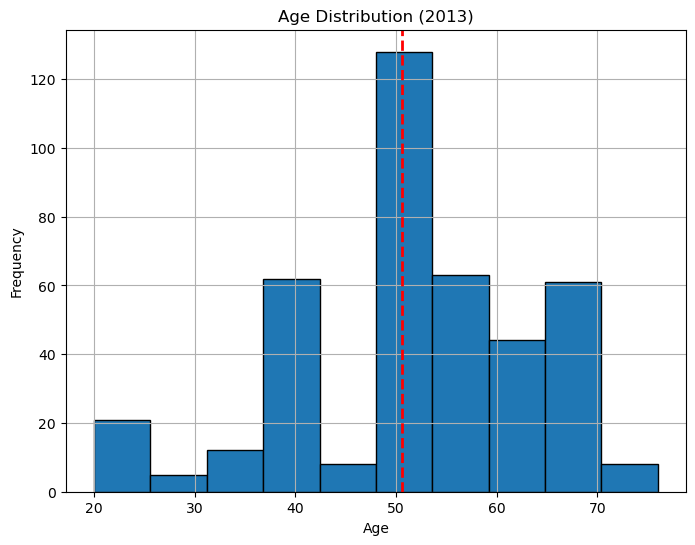

In [277]:
books_2013['Age'].hist(bins=10, edgecolor='black', figsize=(8,6))

plt.title('Age Distribution (2013)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.axvline(50.6, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {50.6:.2f}')

plt.show()

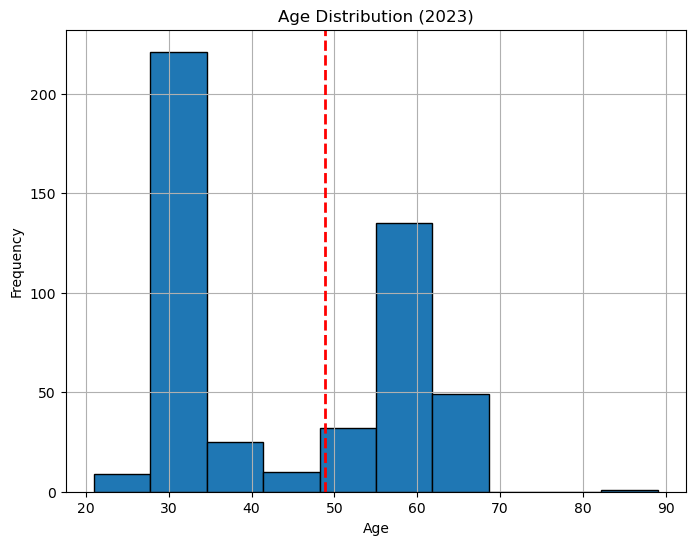

In [275]:
books_2023['Age'].hist(bins=10, edgecolor='black', figsize=(8,6))

plt.title('Age Distribution (2023)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.axvline(48.8, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {48.8:.2f}')

plt.show()

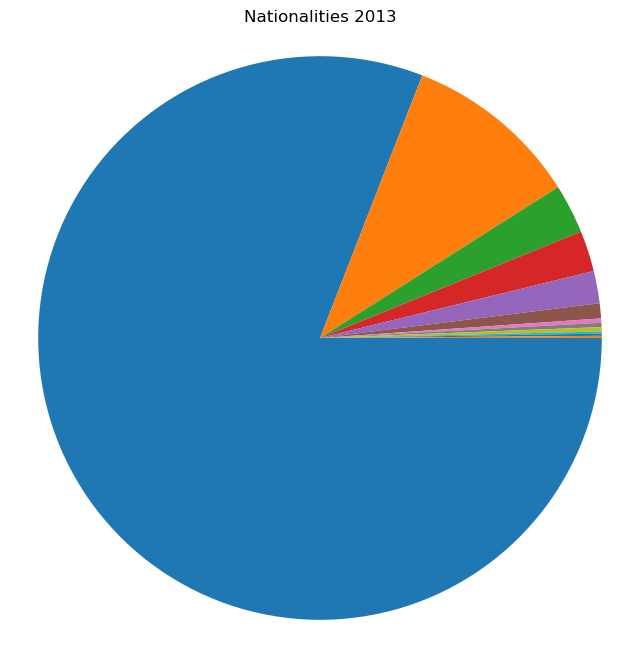

In [267]:
Nationalities_2013 = {'Nationality': ['American', 'British', 'Australian', 'English', 'Canadian', 'Irish',
                        'Dutch', 'Norwegian', 'Danish', 'Swedish', 'New Zealand', 'Zimbabwean'],
        'Count': [657, 82, 23, 19, 15, 7, 2, 2, 2, 1, 1, 1]}

Nationalities_2013 = pd.DataFrame(data)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(Nationalities_2013['Count'], counterclock=False)

plt.axis('equal')

plt.title('Nationalities 2013')

plt.show()

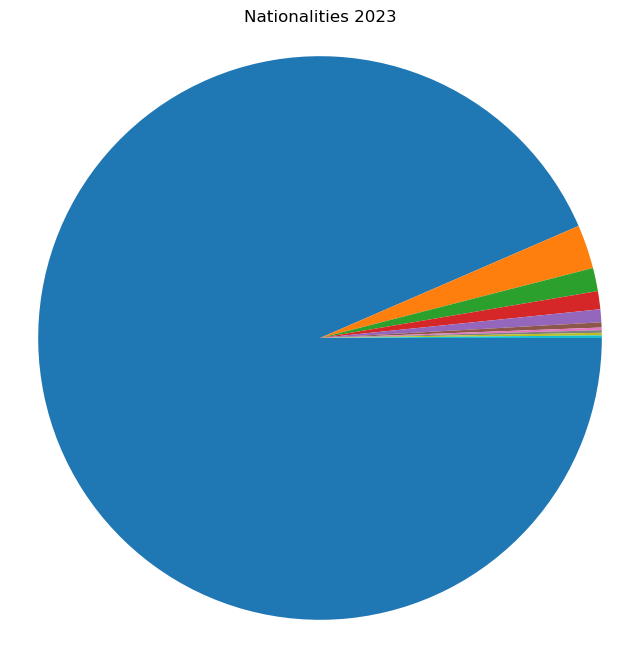

In [273]:
Nationalities_2023 = {'Nationality': ['American', 'British', 'Canadian', 'English', 'Italian', 'New Zealand', 
                        'Swedish', 'Irish', 'Australian', 'Norwegian'],
        'Count': [632, 17, 9, 7, 5, 2, 1, 1, 1, 1]}

Nationalities_2013 = pd.DataFrame(data)

plt.figure(figsize=(8, 8))
plt.pie(Nationalities_2023['Count'], counterclock=False)

plt.axis('equal')

plt.title('Nationalities 2023')

plt.show()

In [ ]:
# 2013: Americans = 80.9%; 2023 Americans = 93.5%